# RFP: Targeted Taco Bell Ads

## Project Overview
You are invited to submit a proposal that answers the following question:

### What ad will you create and why?

*Please submit your proposal by **1/30/25 at 11:59 PM**.*

## Required Proposal Components

### 1. Data Description
In the code cell below, read in the data you will need to train and test your model. Call `info()` once you have read the data into a dataframe. Consider using some or all of the following sources:
- [Customer Demographics](https://drive.google.com/file/d/1HK42Oa3bhhRDWR1y1wVBDAQ2tbNwg1gS/view?usp=sharing)
- [Ad Response Data](https://drive.google.com/file/d/1cuLqXPNKhP66m5BP9BAlci2G--Vopt-Z/view?usp=sharing)

*Note, a level 5 dataset combines these two data sets.*

In [1]:
import pandas as pd

# Read each CSV into a separate dataframe
customer_data = pd.read_csv('customer_data.csv')
ad_data = pd.read_csv('ad_data.csv')

# Merge the dataframes based on 'customer_id'
combined_data = pd.merge(customer_data, ad_data, on='customer_id', how='inner')  # 'inner' ensures only matching customer_id rows are kept

# Show information about each dataframe
print("Customer Data Info:")
customer_data.info()
print("\nAd Data Info:")
ad_data.info()

# Show the columns of each dataframe
print("\nCustomer Data Columns:")
print(customer_data.columns)

print("\nAd Data Columns:")
print(ad_data.columns)

# Display combined data info
print("\nCombined Data Info:")
combined_data.info()

# Optionally, display the first few rows of the merged dataframe to inspect
print("\nCombined Data (First 5 rows):")
print(combined_data.head())


Customer Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   customer_id  10000 non-null  int64  
 1   state        10000 non-null  object 
 2   sex          10000 non-null  object 
 3   age          10000 non-null  float64
 4   occupation   10000 non-null  object 
 5   family_size  10000 non-null  int64  
 6   income       10000 non-null  int64  
dtypes: float64(1), int64(3), object(3)
memory usage: 547.0+ KB

Ad Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   customer_id       10000 non-null  int64 
 1   ad_type           10000 non-null  object
 2   ad_medium         10000 non-null  object
 3   ad_response       10000 non-null  bool  
 4   items_purchased   10000 non-

### 2. Training Your Model
In the cell seen below, write the code you need to train a K-means clustering model. Make sure you describe the center of each cluster found.

*Note, level 5 work uses at least 3 features to train a K-means model using only the standard Python library and Pandas. A level 4 uses external libraries like scikit or numpy.*

### 3. Testing Your Model
In the cell seen below, write the code you need to test your K-means model. Then, interpret your findings.

*Note, level 5 testing uses both an elbow plot and a silhouette score to evaluate your model. Level 4 uses one or the other.*

C:\Users\jnygren\AppData\Local\Temp\ipykernel_20232\3211730116.py:19: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  features = (features - features.mean()) / features.std()
C:\Users\jnygren\AppData\Local\Temp\ipykernel_20232\3211730116.py:19: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  features = (features - features.mean()) / features.std()
Clustering Iterations: 100%|██████████| 100/100 [09:12<00:00,  5.53s/it]


Final cluster centers:
Cluster 1 center: {'age': -1.6853185513809876e-16, 'income': 2.978117752405751e-16, 'ad_response': nan, 'items_purchased': -1.245503700175732e-16, 'drinks_purchased': nan}
Cluster 2 center: {'age': 0.9947637080526885, 'income': -1.60012760643502, 'ad_response': nan, 'items_purchased': -1.136673031067735, 'drinks_purchased': nan}
Cluster 3 center: {'age': 0.9947637080526885, 'income': -0.6480673895997607, 'ad_response': nan, 'items_purchased': -0.7290501700649321, 'drinks_purchased': nan}
Cluster 4 center: {'age': -1.0051633286435089, 'income': -0.8211692472061715, 'ad_response': nan, 'items_purchased': -0.7120008932999871, 'drinks_purchased': nan}
Cluster 5 center: {'age': 0.9947637080526885, 'income': -0.21531274558373376, 'ad_response': nan, 'items_purchased': 0.6900042457050298, 'drinks_purchased': nan}


Clustering Iterations: 100%|██████████| 100/100 [17:51<00:00, 10.71s/it]


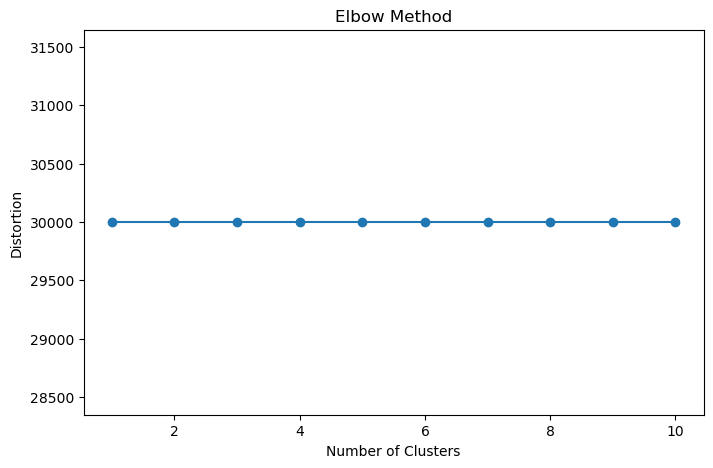

Clustering Iterations:  30%|███       | 30/100 [06:26<09:37,  8.24s/it]  

In [ ]:
import pandas as pd
import random
import matplotlib.pyplot as plt
from tqdm import tqdm
from sklearn.metrics import silhouette_score

# Read in the customer_data and ad_data
customer_data = pd.read_csv('customer_data.csv')
ad_data = pd.read_csv('ad_data.csv')

# Merge customer_data and ad_data based on customer_id
combined_data = pd.merge(customer_data, ad_data, on='customer_id', how='inner')

# Select relevant numerical features for clustering
columns = ['age', 'income', 'ad_response', 'items_purchased', 'drinks_purchased']
features = combined_data[columns].dropna()

# Standardize the data (mean centering)
features = (features - features.mean()) / features.std()

# K-means clustering implementation
def kmeans_clustering(data, k, max_iters=100):
    centroids = data.sample(n=k, random_state=42).values.tolist()
    
    for _ in tqdm(range(max_iters), desc="Clustering Iterations"):
        clusters = {i: [] for i in range(k)}
        
        for _, row in data.iterrows():
            distances = [sum((row - centroid) ** 2) ** 0.5 for centroid in centroids]
            cluster_index = distances.index(min(distances))
            clusters[cluster_index].append(row.values)
        
        new_centroids = []
        for i in range(k):
            if clusters[i]:
                new_centroids.append(pd.DataFrame(clusters[i]).mean().tolist())
            else:
                new_centroids.append(data.sample(n=1).values[0])
        
        if centroids == new_centroids:
            break
        centroids = new_centroids
    
    return centroids, clusters

# Elbow plot evaluation
def elbow_method(data, max_k=10):
    distortions = []
    for k in range(1, max_k + 1):
        centroids, clusters = kmeans_clustering(data, k)
        
        distortion = 0
        for centroid, cluster in zip(centroids, clusters.values()):
            if cluster:  # Ensure cluster is not empty
                cluster_df = pd.DataFrame(cluster)
                centroid_df = pd.DataFrame([centroid] * len(cluster_df), columns=cluster_df.columns)
                distortion += ((cluster_df - centroid_df) ** 2).sum().sum()
        
        distortions.append(distortion)
    
    plt.figure(figsize=(8, 5))
    plt.plot(range(1, max_k + 1), distortions, marker='o')
    plt.xlabel('Number of Clusters')
    plt.ylabel('Distortion')
    plt.title('Elbow Method')
    plt.show()

# Silhouette score evaluation
def silhouette_evaluation(data, k):
    centroids, clusters = kmeans_clustering(data, k)
    labels = []
    clustered_data = []
    for cluster_idx, points in clusters.items():
        for point in points:
            labels.append(cluster_idx)
            clustered_data.append(point)
    
    if len(set(labels)) > 1:  # Silhouette score requires at least 2 clusters
        score = silhouette_score(pd.DataFrame(clustered_data), labels)
        print(f'Silhouette Score for k={k}: {score}')
    else:
        print(f'Silhouette Score for k={k} is undefined (only one cluster).')

# Run clustering and evaluation
k = 5  # Define number of clusters
centroids, clusters = kmeans_clustering(features, k)

print("Final cluster centers:")  
for i, center in enumerate(centroids):  
    print(f"Cluster {i + 1} center: {dict(zip(columns, center))}")  

elbow_method(features)
silhouette_evaluation(features, k)


Cluster Two:

Predominately female
Students

Variety of ages

Respond well to youtube ads

prefered medium is video

familes of 1-2

Low income

Enjoys drinks

item to sell: Baja Blast!

#### Interpret your elbow plot and/or silhouette score here.

### 4. Final Answer

In the first cell seen below, describe the cluster you have chosen to target with your ad, making sure to describe the type of ad they were the most likely to respond to. Then, use software of your choosing to create the ad you will need to target this cluster. You do not need to create an ad for both the nacho fries and the Baja Blast. You can focus on one if that's what your cluster cares about most.

In the second cell seen below, include a link to your ad.

*Note, a level 5 ad uses the medium (static image or video) the cluster most likely responded to.* 

#### Describe the cluster you are targeting here.

#### Link your ad here.

   culmen_length_mm  culmen_depth_mm  flipper_length_mm  body_mass_g
0              39.1             18.7              181.0       3750.0
1              39.5             17.4              186.0       3800.0
2              40.3             18.0              195.0       3250.0
4              36.7             19.3              193.0       3450.0
5              39.3             20.6              190.0       3650.0
3
